In [10]:
import os
import sys
import glob

import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import Angle
from astropy.time import Time
from astropy import units as u

sys.path.append('../')
from BSA3_pack import *

In [3]:
crab_files = sorted(glob.glob('./data/crab/*'))

+ Краб  (модуль - 6, луч - 7), Ожидаемая координата: 05h34m31.971s
+ 3С123 (модуль - 4, луч - 6), Ожидаемая координата: 04h37m04.375s
+ 3С405 (модуль - 1, луч - 4), Ожидаемая координата: 19h59m28.357s

In [4]:
header, data = read_pnt(crab_files[0])

In [12]:
t_s, t_e = get_time_begin_and_end(header)

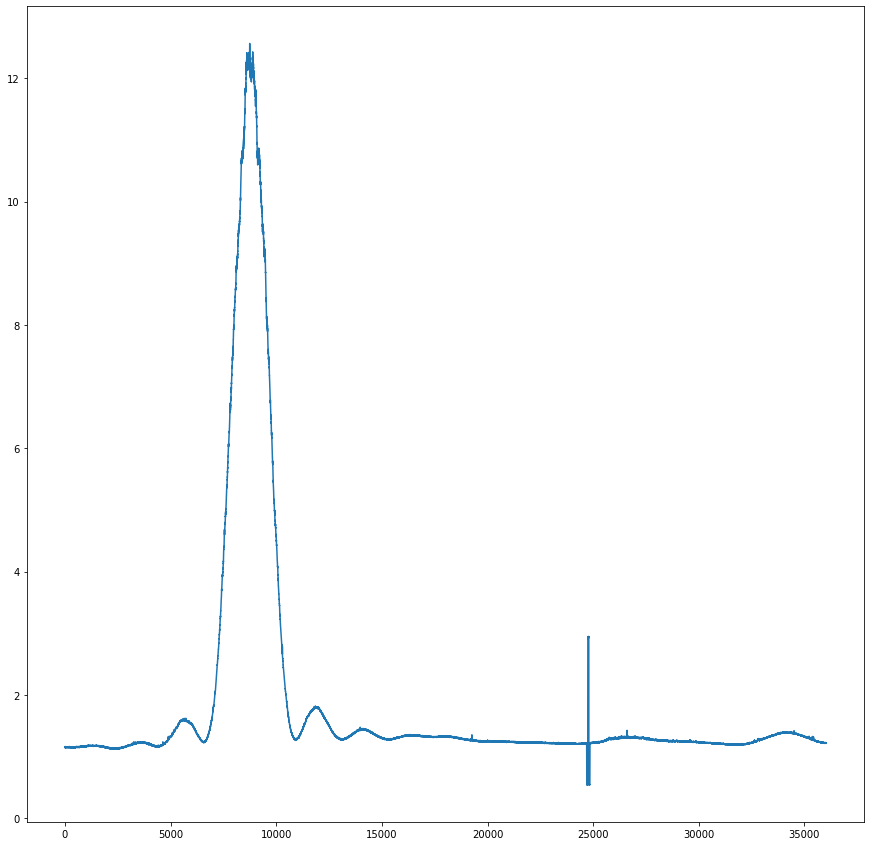

In [9]:
module_1 = 6
ray_1 = 7
chanel = 7
#start_p = 100000
#stop_p = start_p + obs_points

fig, ax = plt.subplots(figsize=(15, 15))

ax.plot([j[module_1-1][ray_1-1][chanel-1] for j in data])
#plt.xlim(start_p, stop_p)
plt.show()

In [42]:
time = t_s
time = Time(time, format='isot', location=('37.631281', '54.820827'))
print(f't_jd = {time.jd}')
t2000 = Time('2000-01-01T00:00:00',
             format='isot',
             scale='utc',
             precision=7
             )
t = time.jd - t2000.jd - 1
print(f't = {t}')
t /= 36525
print(f't = {t}')
s0 = 6 + 41 / 60.0 + 50.55 / 3600.0 + 8640184 / 3600.0 * t + 0.093104 / 3600.0 * t * t - 6.27 / 3600.0 * (1e-6) * t * t * t
print(f's0 = {s0}')
print(f'hour = {time.datetime.hour*u.hour}')
print(f'minute = {time.datetime.minute*u.minute}')
print(f'second = {time.datetime.second*u.second}')
print(f'microsecond = {time.datetime.microsecond*u.microsecond}')
t_culm = (time.datetime.hour*u.hour
          + time.datetime.minute*u.minute
          + time.datetime.second*u.second
          + time.datetime.microsecond*u.microsecond)
print(f't_culm = {t_culm}')
alambda = 2 + 30/60.0 + 34/3600.0
print(f'alambda = {alambda}')
cnst = 2.7379093e-3
print(f'cnst = {cnst}')
s_culm = s0 + (cnst + 1) * t_culm.value + alambda
print(f's_culm = {s_culm}')
delta_lucha = 21.71 * np.pi / 180
fi = 0.956829
be = 0.008436
delt = delta_lucha
culm = s_culm
aa = ((np.sin(fi))**2) * ((np.cos(be))**2) + ((np.cos(fi))**2)
print(f'aa = {aa}')
bb = 2 * np.sin(fi) * np.cos(be) * np.sin(delt)
print(f'bb = {bb}')
cc = ((np.sin(delt))**2) - ((np.cos(fi))**2)
print(f'cc = {cc}')
x = (bb + np.sqrt((bb*bb) - 4 * aa * cc)) / (2 * aa)
print(f'x = {x}')
y = x * np.sin(be) / np.cos(delt)
print(f'y = {y}')
z = np.sqrt(1 - y * y)
print(f'z = {z}')
t = y / z
print(f't = {t}')

alf = culm * np.pi / 12 + np.arctan(t)
print(f'alf = {alf}')

rs = 4.8481368e-6
am = 46.1 * rs
an = 20.4 * rs

alfa1 = copy.copy(alf)
delta1 = copy.copy(delt)
alfa = copy.copy(alf)

for i in range(2):
    alf_res = alfa - (am + an * np.sin(alfa1) * np.tan(delta1)) * t
    delt_res = delt - an * np.cos(alfa1) * t
    alfa1 = (alf_res + alfa) / 2
    delta1 = (delt_res + delt) / 2

alf_res /= (15 * rs)
delt_res /= rs

alf_res /= 3600
while alf_res >= 24:
    alf_res -= 24

while alf_res < 0:
    alf_res += 24

"""
    if (realSeconds): {
            *realSeconds = alf_res * 3600;
            }
    delt_res /= 3600;
    while delt_res >= 360:
        delt_res -= 360
while delt_res < 0:
    delt_res += 360
    print(Angle(delt_res*u.hourangle))
"""
print(alf_res)
print(Angle(alf_res*u.hourangle))

t_jd = 2456386.0833333335
t = 4840.583333333489
t = 0.13252794889345623
s0 = 324.7712264492473
hour = 14.0 h
minute = 0.0 min
second = 0.0 s
microsecond = 0.0 us
t_culm = 14.0 h
alambda = 2.5094444444444446
cnst = 0.0027379093
s_culm = 341.3190016238918
aa = 0.999952455643446
bb = 0.6046825117145648
cc = -0.1950756045955442
x = 0.8376161354724577
y = 0.007605520502367305
z = 0.9999710776106917
t = 0.007605740478554403
alf = 89.36471126317825
5.348046013134649
5h20m52.9656s


In [43]:
t_begin = Time(t_s, format='isot', location=('37.631281', '54.820827'))
t_begin.sidereal_time('apparent')

<Longitude 5.31312378 hourangle>

In [29]:
np.abs(bb) == np.sqrt(bb*bb)

True

## Elen's code

In [ ]:
def alg(Z,Before, After, head, data, j, STD2, M, path2, wrong, RES, Npoints, RES_DF, STD_DF, S_STD_DF, RES_DN, MEAN):

NAME = str(M[-21:-12])

b = 288120

b1 = str(head['date_begin'][0])

bb1 = [b1[0:2:],b1[3:5:],b1[6:10:]]

bb1 = list(reversed(bb1))

module = 3

ray = 5

data_new = [[data[q][module-1][ray-1][x] for q in range(288120)] for x in range(32)]

t1 = str(head['time_begin'][2])

try:

tt1 = [t1[0:2:],t1[3:5:],t1[6:8:]]

times1 = (str(bb1[0] + '-' + bb1[1] + '-'+ bb1[2] + 'T'+ tt1[0] + ':' + tt1[1] + ':'+ tt1[2])) #ужас

t_begin = Time(times1, format='isot', location=('37.620977d', '54.832479d')) #Москва

except:

tt1 = [t1[0:1:],t1[2:4:],t1[5:7:]]

times1 = (str(bb1[0] + '-' + bb1[1] + '-'+ bb1[2] + 'T'+ tt1[0] + ':' + tt1[1] + ':'+ tt1[2])) #ужас

t_begin = Time(times1, format='isot', location=('37.620977d', '54.832479d')) #Москва

dt = TimeDelta(0.0124928, format='sec')

time = [(t_begin + dt*i) for i in (range(0,b,4802))]

time_s = []

for i in range (len(time)):

time_s.append(time[i].sidereal_time('apparent'))

time_s[i].to_string(u.hourangle)

time_s[i] = (time_s[i].value)

time_s.sort()

a = [1,37,21] #ТИПА ПОПРАВЛЫЕ

d = [33,10,0]

b = str(head['date_begin'][0])

bb = [b[0:2:],b[3:5:],b[6:10:]]

bb = list(reversed(bb))

year = bb[0]

month = bb[1]

if int(month[0]) == 0:

month = month[1::]

day = bb[2]

if int(day[0]) == 0:

day = day[1::]

t0 = int(year)+int(month)/12+int(day)/365

#a, d, t0 = prec(a,d,t0)

source = a[0] + a[1]/60 + a[2]/3600

deg = d[0] + d[1]/60 + d[2]/3600

b = 288120

def Where(time_s, source):

pos = bisect_left(time_s, source)

before = time_s[pos - 1]

after = time_s[pos]

if after - source < source - before:

return after

else:

return before

time1 = [i for i in range (b)]

mean1 = Where(time_s, source)

mean = time1[(time_s.index(mean1))*4803]

time = [(t_begin + dt*i) for i in (range(mean-2401,mean+2401))]

test = time#[mean-4802:mean+4802]

test_s = [0 for i in range(len(test))]

for i in (range (len(test))):

test_s[i] = (test[i].sidereal_time('apparent'))

test_s[i].to_string(u.hourangle)

test_s[i] = (test_s[i].value)

time_s = test_s

mean1 = Where(time_s, source)

mean2 = (time_s.index(mean1))

q = round((len(time_s)/2)) - mean2

q2 = mean2 - round((len(time_s)/2))

B = str(head['npoints'])

B = int(B[2:-2:])

time1 = [i for i in range (b)]

if mean1 < (len(time_s)/2):

mean3 = time1[time1.index(mean) - abs(q)]

else:

mean3 = time1[time1.index(mean) + abs(q2)]